In [1]:
import pandas as pd
import numpy as np




In [2]:
file_path = "/Users/kilian_1/Desktop/Education/Bayes_MSc_Energy_Trade_and_Finance/Term_3/Market Microstructure/Market-Microstucture-Rep/SMM921_trading_data_2025.csv"

df = pd.read_csv(file_path)

print(df.head(25))
print(len(df))

    Stock        Date and time    Last   Volume  Num. Trades     Bid     Ask  \
0   AAL.L  2025-01-20T05:00:00     NaN      NaN          NaN  2400.0  2600.0   
1   AAL.L  2025-01-20T07:50:00     NaN      NaN          NaN  2600.0  2038.5   
2   AAL.L  2025-01-20T07:52:00     NaN      NaN          NaN  2600.0  2038.5   
3   AAL.L  2025-01-20T07:55:00     NaN      NaN          NaN  2600.0  2038.5   
4   AAL.L  2025-01-20T07:56:00     NaN      NaN          NaN  2600.0  2038.5   
5   AAL.L  2025-01-20T07:58:00     NaN      NaN          NaN  2600.0  2038.5   
6   AAL.L  2025-01-20T07:59:00     NaN      NaN          NaN  2609.0  2166.0   
7   AAL.L  2025-01-20T08:00:00  2553.5  56144.0         52.0  2548.0  2552.5   
8   AAL.L  2025-01-20T08:01:00     NaN      3.0          NaN  2548.0  2551.5   
9   AAL.L  2025-01-20T08:02:00     NaN    431.0          NaN  2548.0  2551.0   
10  AAL.L  2025-01-20T08:03:00  2544.0   2685.0         29.0  2543.0  2545.5   
11  AAL.L  2025-01-20T08:04:00  2545.5  

In [3]:
#Drop rows with missing key fields
df_filtered = df

print(len(df_filtered))
print(type(df_filtered['Date and time']))


#Convert time
'''df_filtered["DateFormatted"] = pd.to_datetime(df_filtered["Date and time"])

df_filtered = df_filtered[df_filtered["DateFormatted"].dt.time >= pd.to_datetime("08:15").time()]
df_filtered = df_filtered[df_filtered["DateFormatted"].dt.time <= pd.to_datetime("16:25").time()]

print(df_filtered.head(6))'''

df_filtered["DateFormatted"] = pd.to_datetime(df_filtered["Date and time"])

df_filtered['mElapsed'] = df_filtered.DateFormatted.dt.hour*60 + df_filtered.DateFormatted.dt.minute
df_filtered = df_filtered[df_filtered.mElapsed > 8 * 60 + 15 - 1]
df_filtered = df_filtered[df_filtered.mElapsed < 16.5 * 60 - 4]


df_filtered = df_filtered.drop(columns=['mElapsed','Date and time'])
print(df_filtered.tail(10))

642844
<class 'pandas.core.series.Series'>
        Stock   Last   Volume  Num. Trades    Bid    Ask  Bid size  Ask size  \
642821  WPP.L  540.2   4021.0         11.0  540.0  540.4    4276.0    2403.0   
642822  WPP.L  539.8  28360.0         68.0  539.6  540.0    7800.0    4138.0   
642823  WPP.L  539.6  30414.0         92.0  539.4  539.8    2752.0    4549.0   
642824  WPP.L  539.0  23320.0         74.0  539.0  539.2    1913.0     905.0   
642825  WPP.L  539.0  15326.0         49.0  539.0  539.2    1161.0     463.0   
642826  WPP.L  538.6  14664.0         48.0  538.6  538.8    1046.0    1547.0   
642827  WPP.L  538.0  26806.0         92.0  538.0  538.2    1097.0    1946.0   
642828  WPP.L  538.4  16378.0         45.0  538.2  538.4     754.0    3643.0   
642829  WPP.L  538.2  12410.0         28.0  538.2  538.4     754.0    4554.0   
642830  WPP.L  538.2  21986.0         59.0  538.0  538.2    2092.0     752.0   

             DateFormatted  
642821 2025-04-17 16:16:00  
642822 2025-04-17 

In [4]:
#Midquotes = 1/2 * (P_b + P_a) where P_b is price bid and P_a is price ask

df_filtered["Midquotes"] = 0.5 * (df_filtered["Bid"] + df_filtered["Ask"])
print(df_filtered.head(5))





    Stock    Last  Volume  Num. Trades     Bid     Ask  Bid size  Ask size  \
22  AAL.L  2555.0  2570.0         13.0  2553.0  2554.5     175.0     442.0   
23  AAL.L  2551.5   501.0          3.0  2548.5  2550.5     316.0     313.0   
24  AAL.L  2553.0  1152.0          8.0  2551.5  2553.0     168.0     279.0   
25  AAL.L  2553.0   743.0          5.0  2553.5  2555.5     251.0     186.0   
26  AAL.L  2556.0   397.0          1.0  2554.0  2556.0     352.0     467.0   

         DateFormatted  Midquotes  
22 2025-01-20 08:15:00    2553.75  
23 2025-01-20 08:16:00    2549.50  
24 2025-01-20 08:17:00    2552.25  
25 2025-01-20 08:18:00    2554.50  
26 2025-01-20 08:19:00    2555.00  


In [5]:
#Midquotes returns
def compute_log_return(x):
    return np.log(x / x.shift(1))

df_filtered["Midquotes Returns"] = df_filtered.groupby("Stock")["Midquotes"].transform(compute_log_return) #A lambda is a way to write a small, anonymous function — just one line — without using def.
print(df_filtered)

        Stock    Last   Volume  Num. Trades     Bid     Ask  Bid size  \
22      AAL.L  2555.0   2570.0         13.0  2553.0  2554.5     175.0   
23      AAL.L  2551.5    501.0          3.0  2548.5  2550.5     316.0   
24      AAL.L  2553.0   1152.0          8.0  2551.5  2553.0     168.0   
25      AAL.L  2553.0    743.0          5.0  2553.5  2555.5     251.0   
26      AAL.L  2556.0    397.0          1.0  2554.0  2556.0     352.0   
...       ...     ...      ...          ...     ...     ...       ...   
642826  WPP.L   538.6  14664.0         48.0   538.6   538.8    1046.0   
642827  WPP.L   538.0  26806.0         92.0   538.0   538.2    1097.0   
642828  WPP.L   538.4  16378.0         45.0   538.2   538.4     754.0   
642829  WPP.L   538.2  12410.0         28.0   538.2   538.4     754.0   
642830  WPP.L   538.2  21986.0         59.0   538.0   538.2    2092.0   

        Ask size       DateFormatted  Midquotes  Midquotes Returns  
22         442.0 2025-01-20 08:15:00    2553.75       

In [6]:
#Spread Data (in bps) 
#Spread = 10000 * (P_a - P_b) / Midquote

df_filtered["Spread_bps"] = 10000 * ((df_filtered["Ask"] - df_filtered["Bid"]) / df_filtered["Midquotes"])
df_filtered = df_filtered[df_filtered["Spread_bps"] >= 0 ]
print(df_filtered.head(5))


    Stock    Last  Volume  Num. Trades     Bid     Ask  Bid size  Ask size  \
22  AAL.L  2555.0  2570.0         13.0  2553.0  2554.5     175.0     442.0   
23  AAL.L  2551.5   501.0          3.0  2548.5  2550.5     316.0     313.0   
24  AAL.L  2553.0  1152.0          8.0  2551.5  2553.0     168.0     279.0   
25  AAL.L  2553.0   743.0          5.0  2553.5  2555.5     251.0     186.0   
26  AAL.L  2556.0   397.0          1.0  2554.0  2556.0     352.0     467.0   

         DateFormatted  Midquotes  Midquotes Returns  Spread_bps  
22 2025-01-20 08:15:00    2553.75                NaN    5.873715  
23 2025-01-20 08:16:00    2549.50          -0.001666    7.844675  
24 2025-01-20 08:17:00    2552.25           0.001078    5.877167  
25 2025-01-20 08:18:00    2554.50           0.000881    7.829321  
26 2025-01-20 08:19:00    2555.00           0.000196    7.827789  


In [7]:
#Depth Data
#Depth = 0.5 * [Q_a * P_a + Q_b * P_b]

df_filtered['Depth'] = 0.5 * (df_filtered['Ask size'] * df_filtered['Ask'] + df_filtered['Bid size'] * df_filtered['Bid'])
print(df_filtered)

        Stock    Last   Volume  Num. Trades     Bid     Ask  Bid size  \
22      AAL.L  2555.0   2570.0         13.0  2553.0  2554.5     175.0   
23      AAL.L  2551.5    501.0          3.0  2548.5  2550.5     316.0   
24      AAL.L  2553.0   1152.0          8.0  2551.5  2553.0     168.0   
25      AAL.L  2553.0    743.0          5.0  2553.5  2555.5     251.0   
26      AAL.L  2556.0    397.0          1.0  2554.0  2556.0     352.0   
...       ...     ...      ...          ...     ...     ...       ...   
642826  WPP.L   538.6  14664.0         48.0   538.6   538.8    1046.0   
642827  WPP.L   538.0  26806.0         92.0   538.0   538.2    1097.0   
642828  WPP.L   538.4  16378.0         45.0   538.2   538.4     754.0   
642829  WPP.L   538.2  12410.0         28.0   538.2   538.4     754.0   
642830  WPP.L   538.2  21986.0         59.0   538.0   538.2    2092.0   

        Ask size       DateFormatted  Midquotes  Midquotes Returns  \
22         442.0 2025-01-20 08:15:00    2553.75      

In [8]:
print(sorted(df_filtered["Stock"].unique()))

myStock = ["AAL.L", "WPP.L", "JMAT.L"]
df_filtered_mystocks = df_filtered[df_filtered["Stock"].isin(myStock)]


n = len(df_filtered_mystocks)
mid = n // 2
print(df_filtered_mystocks.iloc[mid-5:mid+5])

['AAL.L', 'ABF.L', 'BARC.L', 'BNZL.L', 'CPG.L', 'EXPN.L', 'EZJ.L', 'GSK.L', 'JMAT.L', 'LLOY.L', 'MKS.L', 'PSON.L', 'RIO.L', 'SHEL.L', 'TSCO.L', 'TW.L', 'ULVR.L', 'VOD.L', 'WPP.L']
         Stock    Last  Volume  Num. Trades     Bid     Ask  Bid size  \
287108  JMAT.L  1481.0   794.0          8.0  1480.0  1482.0     685.0   
287109  JMAT.L     NaN     NaN          NaN  1481.0  1483.0     225.0   
287110  JMAT.L  1483.0    15.0          2.0  1482.0  1485.0    1939.0   
287111  JMAT.L     NaN     NaN          NaN  1482.0  1484.0    2054.0   
287112  JMAT.L  1484.0   148.0          1.0  1482.0  1484.0    1661.0   
287113  JMAT.L     NaN     NaN          NaN  1482.0  1485.0    1661.0   
287114  JMAT.L     NaN   715.0          NaN  1483.0  1486.0    1126.0   
287115  JMAT.L     NaN     1.0          NaN  1484.0  1486.0     954.0   
287116  JMAT.L  1486.0    80.0          2.0  1485.0  1487.0     258.0   
287117  JMAT.L     NaN    63.0          NaN  1485.0  1486.0     304.0   

        Ask size

In [9]:
df_filtered_mystocks = df_filtered_mystocks.rename(columns={'Num. Trades': 'Trades'})
print(df_filtered_mystocks)


adv = df_filtered_mystocks.Volume.sum()/len(df_filtered_mystocks.DateFormatted.dt.date.unique()) #calculates the Average Daily Volume (ADV) for your dataset.
adt = df_filtered_mystocks.Trades.sum()/len(df_filtered_mystocks.DateFormatted.dt.date.unique()) #calculates the Average Daily Trades (ADT) for the filtered set of stocks in your DataFrame.

print(adv)
print(adt)

        Stock    Last   Volume  Trades     Bid     Ask  Bid size  Ask size  \
22      AAL.L  2555.0   2570.0    13.0  2553.0  2554.5     175.0     442.0   
23      AAL.L  2551.5    501.0     3.0  2548.5  2550.5     316.0     313.0   
24      AAL.L  2553.0   1152.0     8.0  2551.5  2553.0     168.0     279.0   
25      AAL.L  2553.0    743.0     5.0  2553.5  2555.5     251.0     186.0   
26      AAL.L  2556.0    397.0     1.0  2554.0  2556.0     352.0     467.0   
...       ...     ...      ...     ...     ...     ...       ...       ...   
642826  WPP.L   538.6  14664.0    48.0   538.6   538.8    1046.0    1547.0   
642827  WPP.L   538.0  26806.0    92.0   538.0   538.2    1097.0    1946.0   
642828  WPP.L   538.4  16378.0    45.0   538.2   538.4     754.0    3643.0   
642829  WPP.L   538.2  12410.0    28.0   538.2   538.4     754.0    4554.0   
642830  WPP.L   538.2  21986.0    59.0   538.0   538.2    2092.0     752.0   

             DateFormatted  Midquotes  Midquotes Returns  Sprea

In [10]:
'''#Q1 V1
import matplotlib.pyplot as plt

def summary_stats_and_plot(df, selected_stocks):
    stats = {}

    for stock in selected_stocks:
        stock_df = df[df['Stock'] == stock]
        

        # Comment on any outliers and remove them if you believe that there is justification
        #stock_df = stock_df[(stock_df['Spread_bps'] < stock_df['Spread_bps'].quantile(0.99)) &
        #                    (stock_df['Depth'] < stock_df['Depth'].quantile(0.99))]

        # Summary statistics
        spread_stats = stock_df['Spread_bps'].describe()
        depth_stats = stock_df['Depth'].describe()
        stats[stock] = {'Spread': spread_stats, 'Depth': depth_stats}

        # Plotting
        fig, axs = plt.subplots(2, 1, figsize=(12, 6), sharex=True)
        axs[0].plot(stock_df.index, stock_df['Spread_bps'], label='Spread (bps)')
        axs[0].set_ylabel('Spread (bps)')
        axs[0].set_title(f"{stock} Spread Time-Series")

        axs[1].plot(stock_df.index, stock_df['Depth'], label='Depth', color='orange')
        axs[1].set_ylabel('Depth (£)')
        axs[1].set_title(f"{stock} Depth Time-Series")

        plt.tight_layout()
        plt.show()

    return stats
summary_stats_and_plot(df_filtered_mystocks, myStock)'''

'#Q1 V1\nimport matplotlib.pyplot as plt\n\ndef summary_stats_and_plot(df, selected_stocks):\n    stats = {}\n\n    for stock in selected_stocks:\n        stock_df = df[df[\'Stock\'] == stock]\n        \n\n        # Comment on any outliers and remove them if you believe that there is justification\n        #stock_df = stock_df[(stock_df[\'Spread_bps\'] < stock_df[\'Spread_bps\'].quantile(0.99)) &\n        #                    (stock_df[\'Depth\'] < stock_df[\'Depth\'].quantile(0.99))]\n\n        # Summary statistics\n        spread_stats = stock_df[\'Spread_bps\'].describe()\n        depth_stats = stock_df[\'Depth\'].describe()\n        stats[stock] = {\'Spread\': spread_stats, \'Depth\': depth_stats}\n\n        # Plotting\n        fig, axs = plt.subplots(2, 1, figsize=(12, 6), sharex=True)\n        axs[0].plot(stock_df.index, stock_df[\'Spread_bps\'], label=\'Spread (bps)\')\n        axs[0].set_ylabel(\'Spread (bps)\')\n        axs[0].set_title(f"{stock} Spread Time-Series")\n\n      

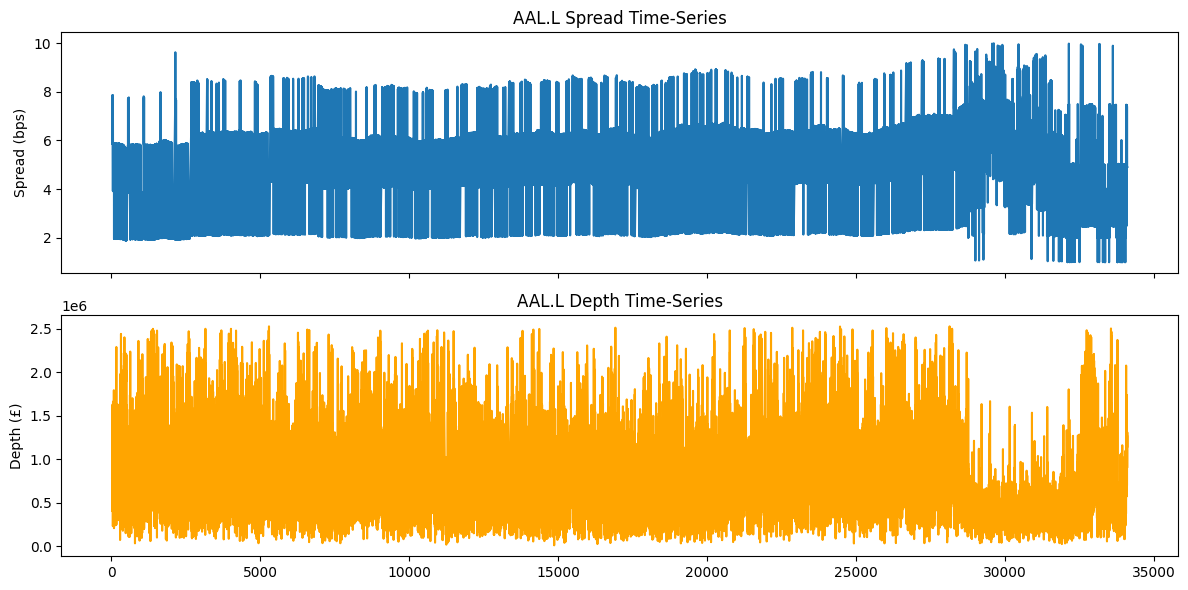

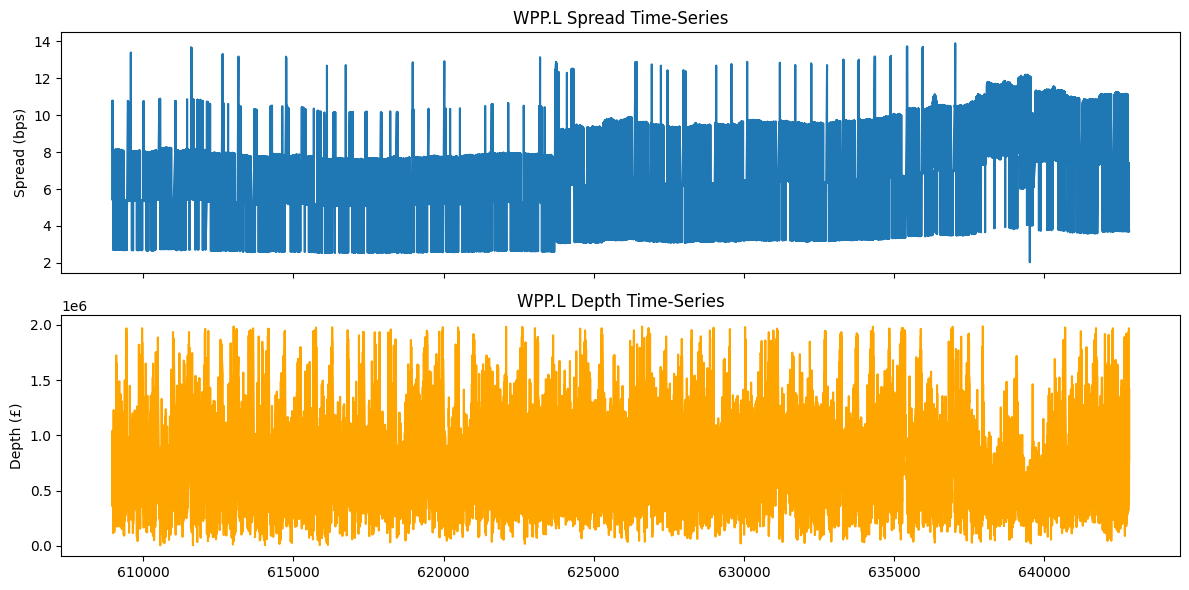

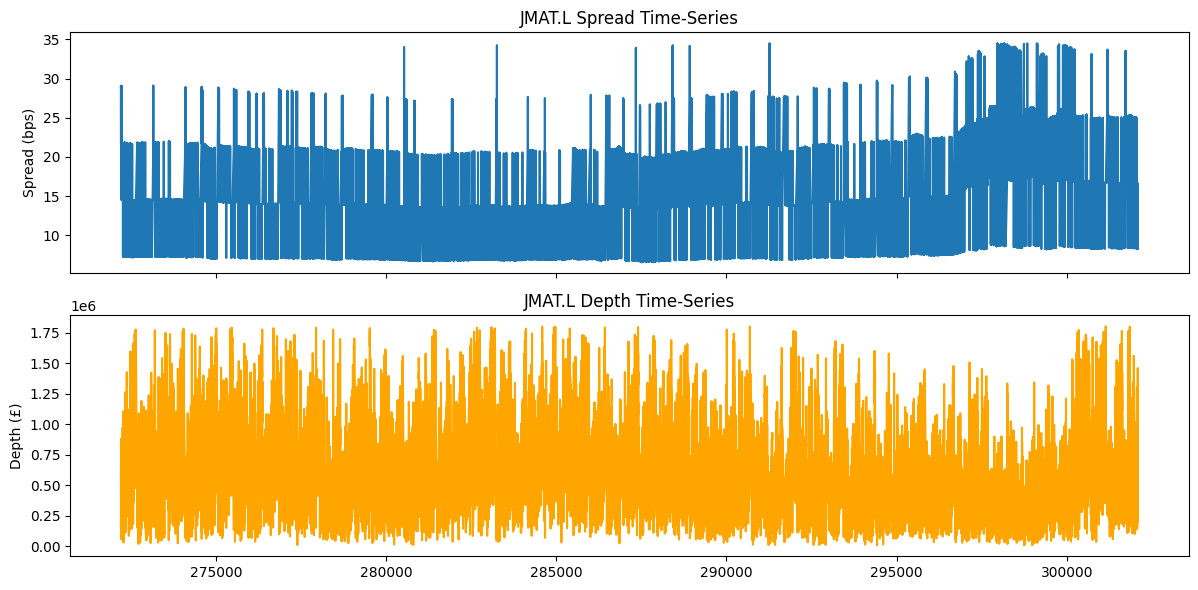

{'AAL.L': {'Spread': count    30768.000000
  mean         4.973425
  std          1.544656
  min          1.000050
  25%          4.130525
  50%          4.359198
  75%          6.279435
  max          9.990564
  Name: Spread_bps, dtype: float64,
  'Depth': count    3.076800e+04
  mean     7.738627e+05
  std      4.358946e+05
  min      1.195800e+04
  25%      4.443698e+05
  50%      6.940091e+05
  75%      1.016444e+06
  max      2.525802e+06
  Name: Depth, dtype: float64},
 'WPP.L': {'Spread': count    30631.000000
  mean         6.660680
  std          2.094577
  min          2.029427
  25%          5.248655
  50%          6.418485
  75%          7.748935
  max         13.898541
  Name: Spread_bps, dtype: float64,
  'Depth': count    3.063100e+04
  mean     7.313613e+05
  std      3.420802e+05
  min      3.667900e+03
  25%      4.867614e+05
  50%      6.834779e+05
  75%      9.209774e+05
  max      1.987511e+06
  Name: Depth, dtype: float64},
 'JMAT.L': {'Spread': count    26720.000

In [11]:
#Q1 V2
import matplotlib.pyplot as plt

def summary_stats_and_plot(df, selected_stocks):
    stats = {}

    for stock in selected_stocks:
        stock_df = df[df['Stock'] == stock]
        

        # Comment on any outliers and remove them if you believe that there is justification
        stock_df = stock_df[(stock_df['Spread_bps'] < stock_df['Spread_bps'].quantile(0.99)) &   #------
                            (stock_df['Depth'] < stock_df['Depth'].quantile(0.99))]   #------

        # Summary statistics
        spread_stats = stock_df['Spread_bps'].describe()
        depth_stats = stock_df['Depth'].describe()
        stats[stock] = {'Spread': spread_stats, 'Depth': depth_stats}

        # Plotting
        fig, axs = plt.subplots(2, 1, figsize=(12, 6), sharex=True)
        axs[0].plot(stock_df.index, stock_df['Spread_bps'], label='Spread (bps)')
        axs[0].set_ylabel('Spread (bps)')
        axs[0].set_title(f"{stock} Spread Time-Series")

        axs[1].plot(stock_df.index, stock_df['Depth'], label='Depth', color='orange')
        axs[1].set_ylabel('Depth (£)')
        axs[1].set_title(f"{stock} Depth Time-Series")

        plt.tight_layout()
        plt.show()

    return stats
summary_stats_and_plot(df_filtered_mystocks, myStock)

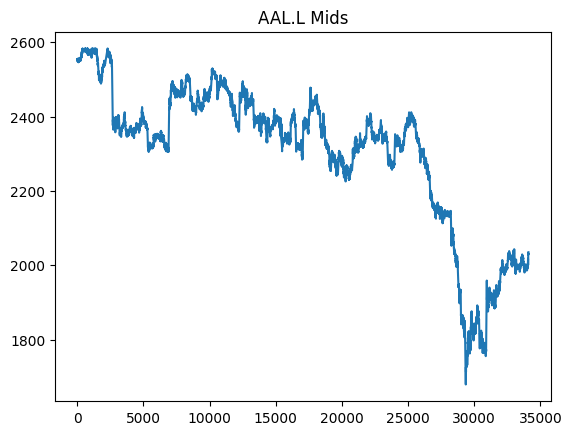

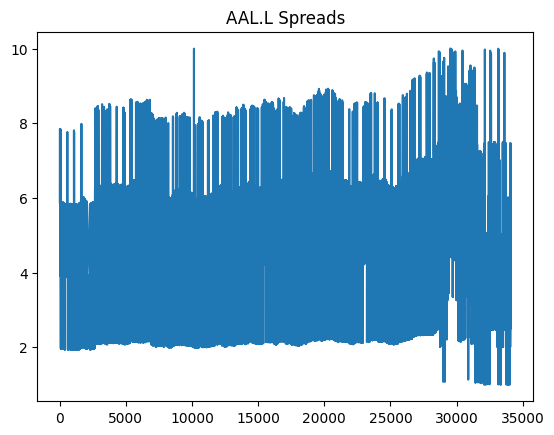

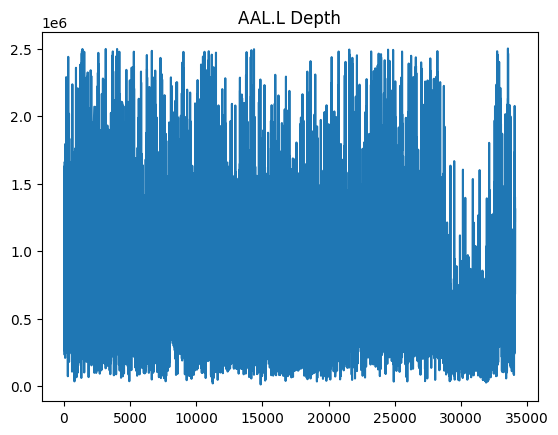

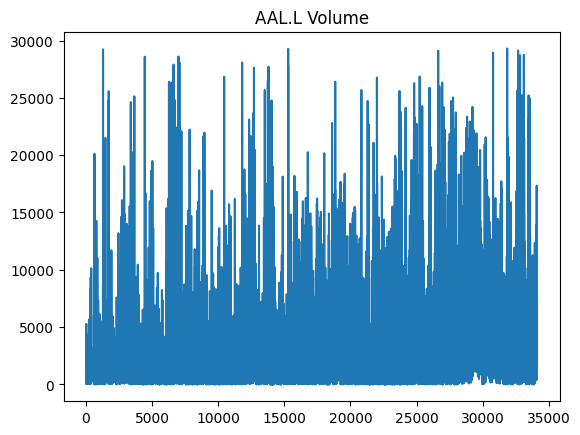

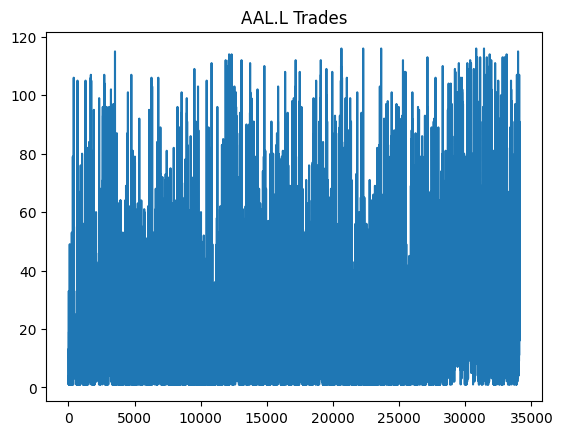

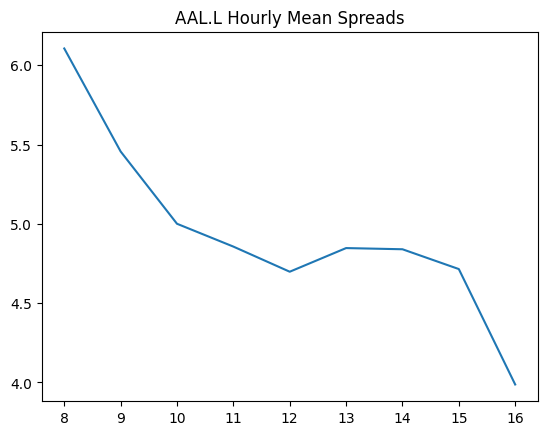

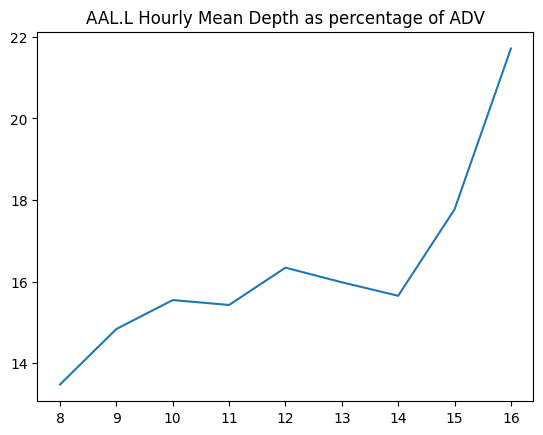

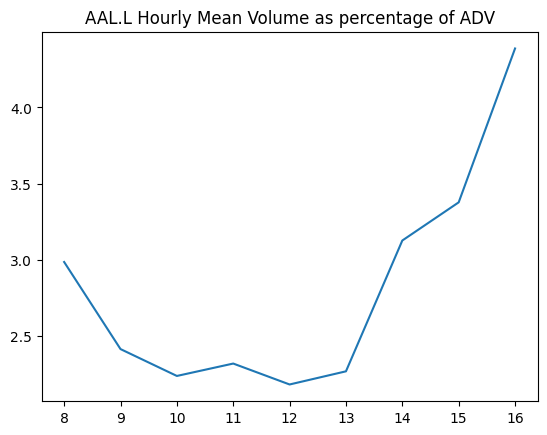

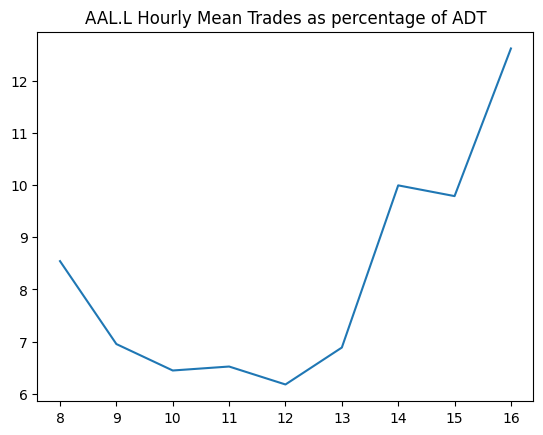

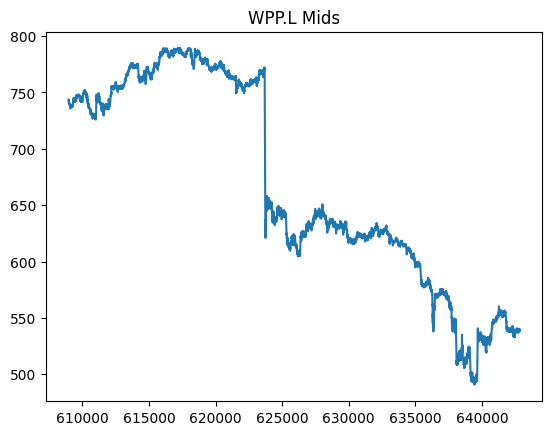

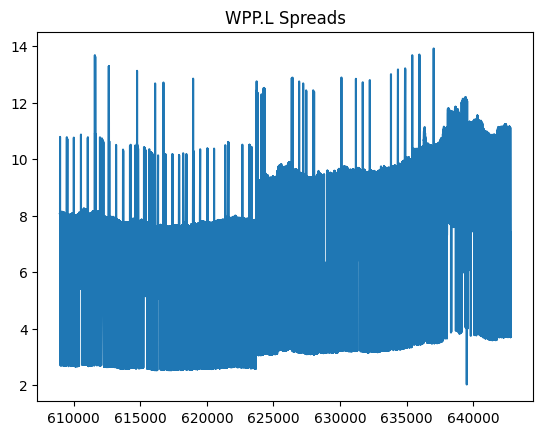

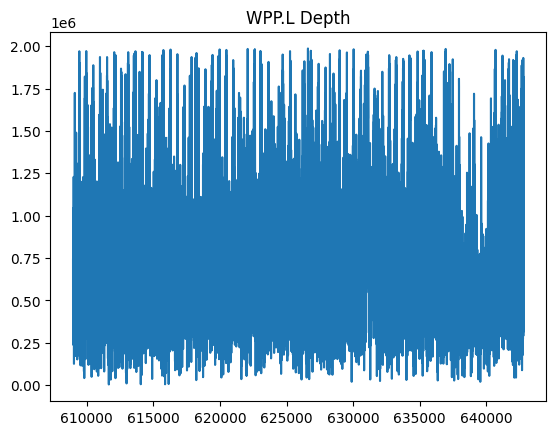

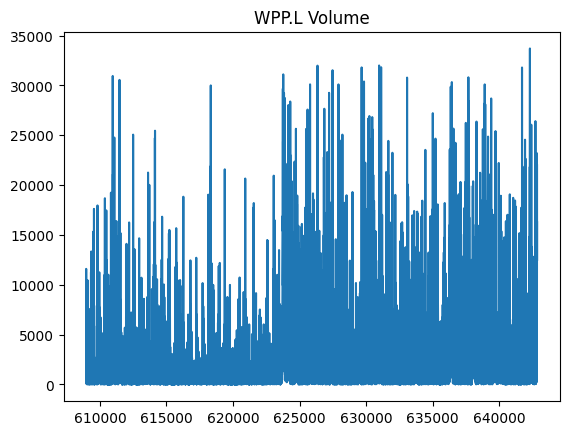

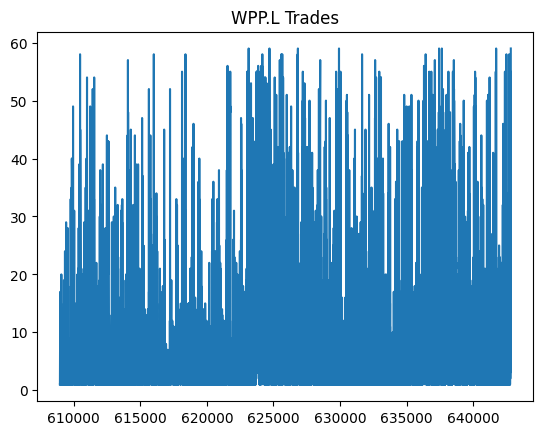

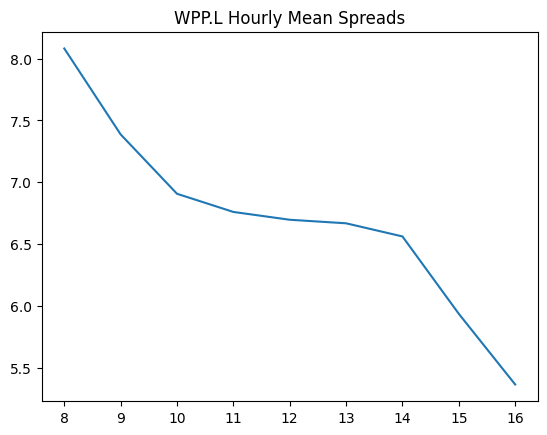

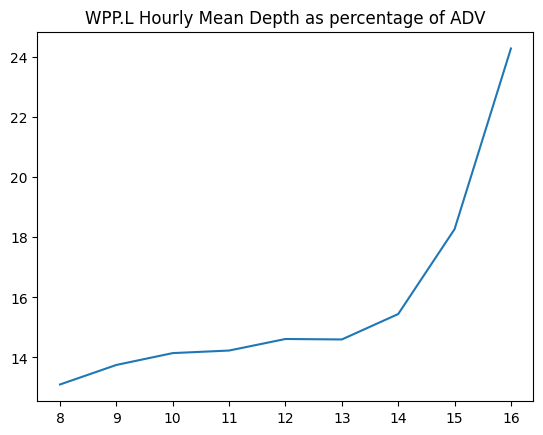

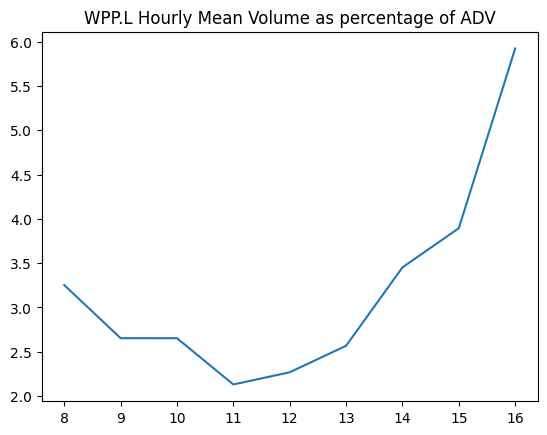

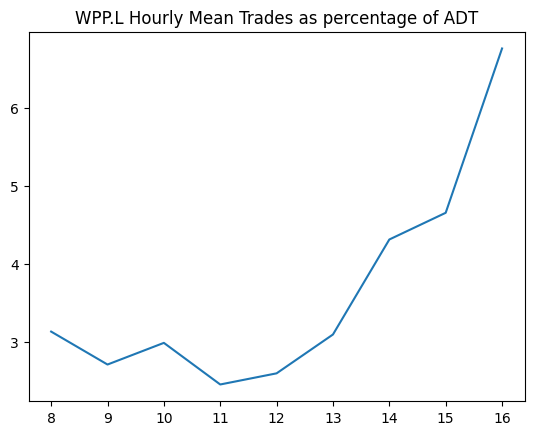

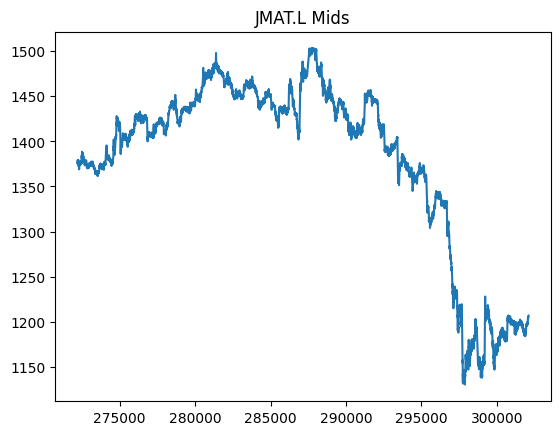

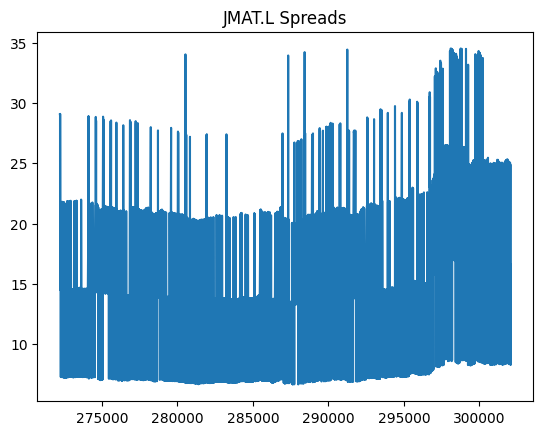

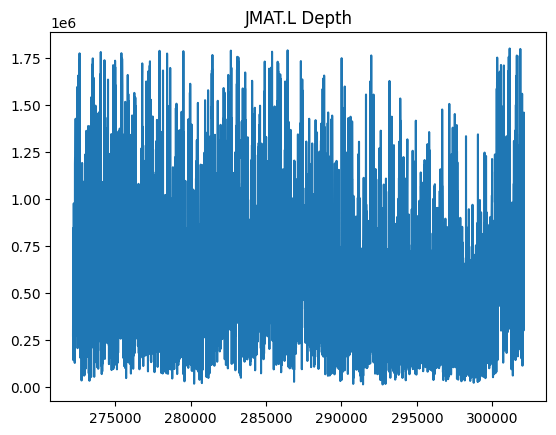

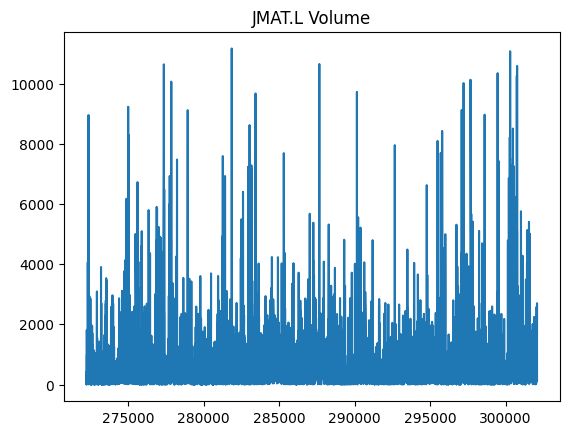

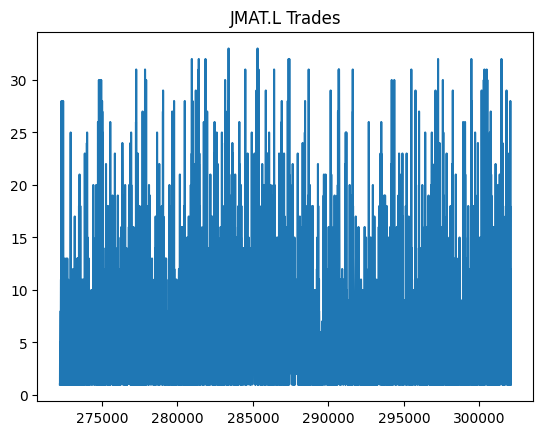

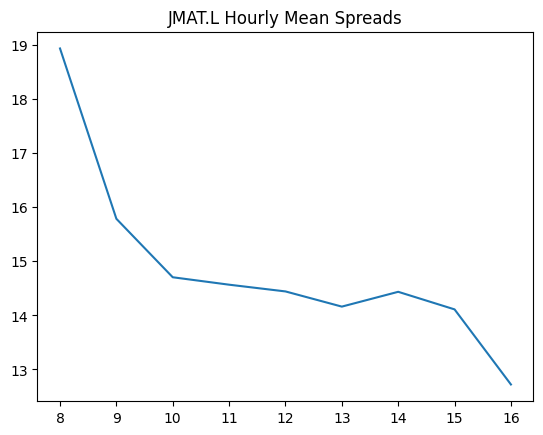

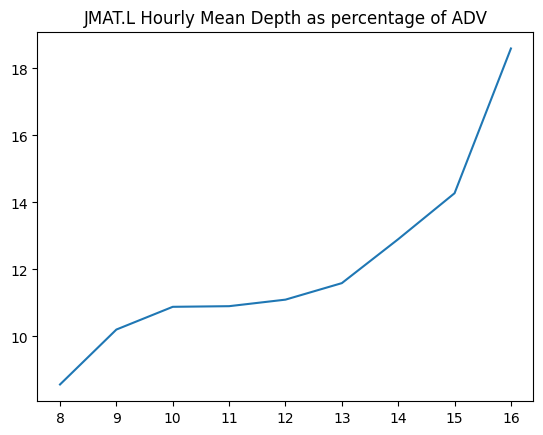

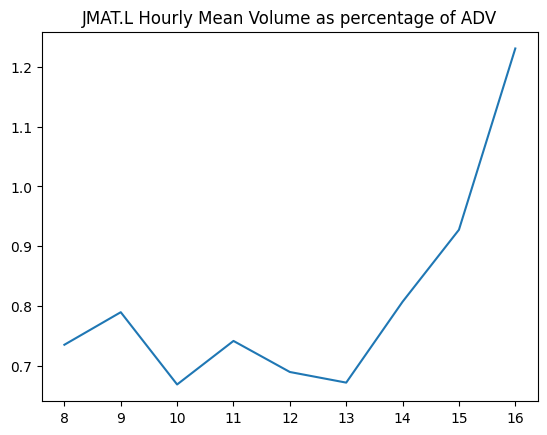

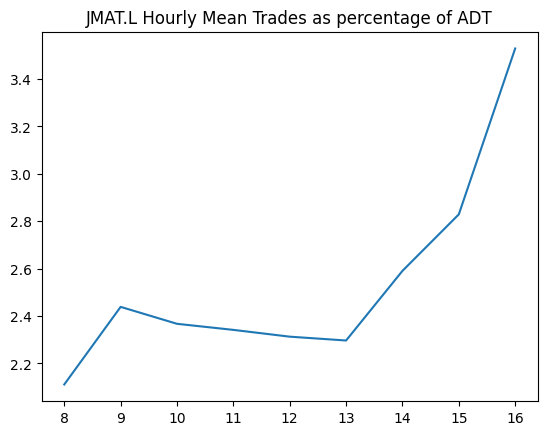

In [12]:
import matplotlib.pyplot as plt

for myStock in ["AAL.L", "WPP.L", "JMAT.L"]:
    data = df_filtered_mystocks[df_filtered_mystocks["Stock"] == myStock].copy()
    #data = data.sort_values("DateFormatted")
    
    numeric_cols = ["Midquotes", "Spread_bps", "Depth", "Volume", "Trades"]  #------
    for col in numeric_cols:  #------
        if col in data.columns:  #------
            q99 = data[col].quantile(0.99)  #------
            data = data[data[col] <= q99]  #------


    # Plot Midquotes
    plt.plot(data.Midquotes)
    plt.title(myStock + " Mids")
    #plt.savefig(myStock[0:3] + '_mid.pdf')
    plt.show()
    plt.close()

    # Plot Spread
    plt.plot(data.Spread_bps)
    plt.title(myStock + " Spreads")
    #plt.savefig(myStock[0:3] + '_spread.pdf')
    plt.show()
    plt.close()

    # Plot Depth
    plt.plot(data.Depth)
    plt.title(myStock + " Depth")
    #plt.savefig(myStock[0:3] + '_depth.pdf')
    plt.show()
    plt.close()

    # Plot Volume
    plt.plot( data.Volume)
    plt.title(myStock + " Volume")
    #plt.savefig(myStock[0:3] + '_volume.pdf')
    plt.show()
    plt.close()

    # Plot Trades
    plt.plot( data.Trades)
    plt.title(myStock + " Trades")
    #plt.savefig(myStock[0:3] + '_trades.pdf')
    plt.show()
    plt.close()

    #Q2
    # Hourly means
    #Create mean spread and depth measures for each hour of the day for each of the three stocks.
    hourlyMeans = data.groupby(data["DateFormatted"].dt.hour).mean(numeric_only=True)
    

    plt.plot(hourlyMeans.Spread_bps)
    plt.title(myStock + " Hourly Mean Spreads")
    #plt.savefig(myStock[0:3] + '_hourlySpread.pdf')
    plt.show()
    plt.close()

    plt.plot(100 * hourlyMeans.Depth / adv)
    plt.title(myStock + " Hourly Mean Depth as percentage of ADV")
    #plt.savefig(myStock[0:3] + '_hourlyDepth.pdf')
    plt.show()
    plt.close()

    plt.plot(100 * hourlyMeans.Volume * 60 / adv)
    plt.title(myStock + " Hourly Mean Volume as percentage of ADV")
    #plt.savefig(myStock[0:3] + '_hourlyVolume.pdf')
    plt.show()
    plt.close()

    plt.plot(100 * hourlyMeans.Trades * 60 / adt)
    plt.title(myStock + " Hourly Mean Trades as percentage of ADT")
    #plt.savefig(myStock[0:3] + '_hourlyTrades.pdf')
    plt.show()
    plt.close()

DateFormatted
2025-01-20    13.925082
2025-01-21    13.468379
2025-01-22    12.732432
2025-01-23    11.575665
2025-01-24    14.761889
                ...    
2025-04-11    21.747244
2025-04-14    15.894243
2025-04-15    16.452986
2025-04-16    16.673726
2025-04-17    18.207398
Name: Spread_bps, Length: 64, dtype: float64


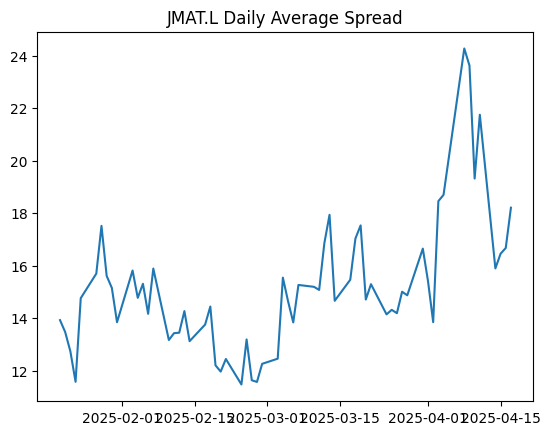

DateFormatted
2025-01-20    7.157009e+05
2025-01-21    5.791947e+05
2025-01-22    7.486266e+05
2025-01-23    7.898587e+05
2025-01-24    6.513774e+05
                  ...     
2025-04-11    4.125642e+05
2025-04-14    8.338132e+05
2025-04-15    1.033980e+06
2025-04-16    6.952207e+05
2025-04-17    5.543448e+05
Name: Depth, Length: 64, dtype: float64


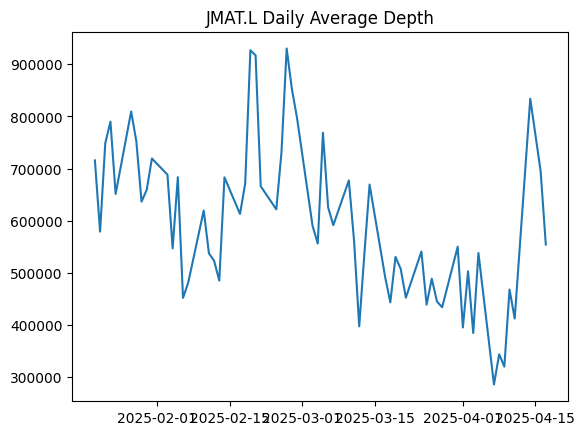

DateFormatted
2025-01-20    0.000260
2025-01-21    0.000207
2025-01-22    0.000220
2025-01-23    0.000212
2025-01-24    0.000279
                ...   
2025-04-11    0.000621
2025-04-14    0.000469
2025-04-15    0.000361
2025-04-16    0.000394
2025-04-17    0.000310
Name: Midquotes Returns, Length: 64, dtype: float64


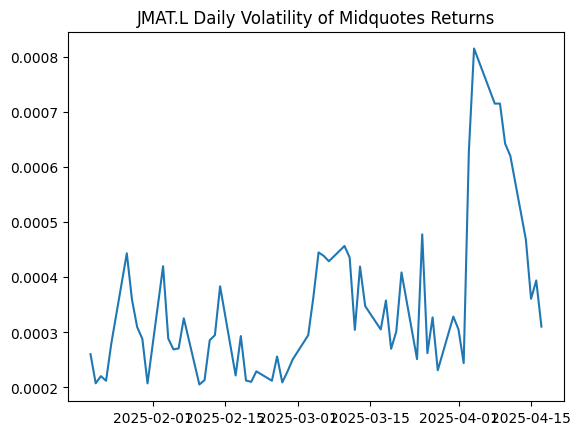

'Then interpret:\n\nWhich days were more volatile?\n\nDid spreads widen on volatile days?\n\nWas depth lower during high volatility?'

In [13]:
#Q3
#Let's pick one stock : JMAT.L

data_q3 = df_filtered_mystocks[df_filtered_mystocks["Stock"] == 'JMAT.L'].copy()

#print(data_q3.head(5))

#--------------------------------------------------------
daily_avg_spread = data_q3.groupby(data_q3["DateFormatted"].dt.date)["Spread_bps"].mean()
print(daily_avg_spread)


q99_spread = daily_avg_spread.quantile(0.99) #------
daily_avg_spread = daily_avg_spread[daily_avg_spread <= q99_spread] #------

plt.plot(daily_avg_spread)
plt.title("JMAT.L Daily Average Spread")
plt.show()

#--------------------------------------------------------

daily_avg_depth = data_q3.groupby(data_q3["DateFormatted"].dt.date)["Depth"].mean()
print(daily_avg_depth)


q99_depth = daily_avg_depth.quantile(0.99) #------
daily_avg_depth = daily_avg_depth[daily_avg_depth <= q99_depth] #------

plt.plot(daily_avg_depth)
plt.title("JMAT.L Daily Average Depth")
plt.show()

#--------------------------------------------------------

daily_vol_midquotes = data_q3.groupby(data_q3["DateFormatted"].dt.date)["Midquotes Returns"].apply(lambda x: x.abs().mean())
print(daily_vol_midquotes)

q99_vol = daily_vol_midquotes.quantile(0.99) #------
daily_vol_midquotes = daily_vol_midquotes[daily_vol_midquotes <= q99_vol] #------

plt.plot(daily_vol_midquotes)
plt.title("JMAT.L Daily Volatility of Midquotes Returns")
plt.show()



'''Then interpret:

Which days were more volatile?

Did spreads widen on volatile days?

Was depth lower during high volatility?'''


In [14]:
'''Calculate correlations:
Between daily spread and volatility
Between daily depth and volatility'''

# Now calculate the correlation:
corr_spread_depth = daily_avg_spread.corr(daily_avg_depth)

print("Correlation between daily average spreads and daily average depth:", corr_spread_depth)

'''What does this number tell you?
A correlation close to -1 means that when spreads widen (i.e., liquidity is worse), depth tends to be lower (another sign of lower liquidity), and vice versa.
A correlation near 0 means there is weak or no linear relationship between spread and depth.
A correlation close to +1 would suggest that both measures move together, although that is less common in liquidity analysis.


-->Neg. Corr, suggests that days with wider spreads (which indicate poorer liquidity) also tend to have lower depth (another sign of reduced liquidity).'''

Correlation between daily average spreads and daily average depth: -0.5895092943979012


'What does this number tell you?\nA correlation close to -1 means that when spreads widen (i.e., liquidity is worse), depth tends to be lower (another sign of lower liquidity), and vice versa.\nA correlation near 0 means there is weak or no linear relationship between spread and depth.\nA correlation close to +1 would suggest that both measures move together, although that is less common in liquidity analysis.\n\n\n-->Neg. Corr, suggests that days with wider spreads (which indicate poorer liquidity) also tend to have lower depth (another sign of reduced liquidity).'

In [15]:
import statsmodels.api as sm

# Regression 1: Daily Average Spread on Daily Volatility
# daily_vol_midquotes and daily_avg_spread are Pandas Series indexed by date.
X1 = daily_vol_midquotes.values  # independent variable: volatility
y1 = daily_avg_spread.values       # dependent variable: average spread
X1 = sm.add_constant(X1)           # add an intercept term because sm.OLS() doesn't include the intercept by default

model1 = sm.OLS(y1, X1).fit()
print(model1.summary())

# Regression 2: Daily Average Depth on Daily Volatility
X2 = daily_vol_midquotes.values   # independent variable: volatility
y2 = daily_avg_depth.values         # dependent variable: average depth
X2 = sm.add_constant(X2)            

model2 = sm.OLS(y2, X2).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     105.3
Date:                Fri, 20 Jun 2025   Prob (F-statistic):           6.59e-15
Time:                        13:26:24   Log-Likelihood:                -117.34
No. Observations:                  63   AIC:                             238.7
Df Residuals:                      61   BIC:                             243.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.0176      0.541     18.532      0.0